In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [58]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2-x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

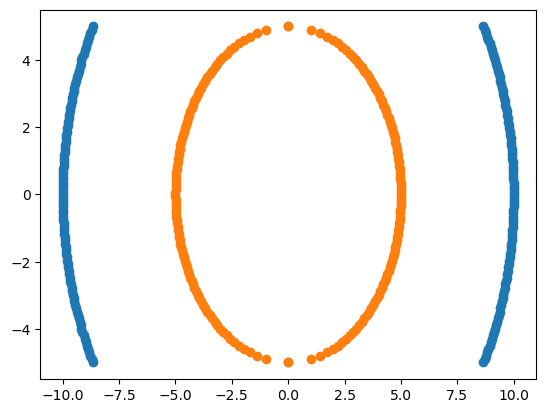

In [59]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [60]:
np.vstack([y,x])

array([[ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
         8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
         9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
         9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
         9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
         9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
         9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
         9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
         9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
         9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
         9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
         9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
         9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
         9.87667553,  9.86013297,  9.84252604,  9.8

In [61]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [62]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['x1','x2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['x1','x2'])
df2['Y'] = 1
df = pd.concat([df1,df2],ignore_index=True)
df.head()

,x1,x2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [63]:
df.tail()

,x1,x2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [64]:
# independent and dependent features
x = df.iloc[:,:2]
y = df.Y

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

### Polynomial kernel formula (refer from polynomial kernel wikipedia)

In [67]:
df['x1_square'] = df['x1']**2
df['x2_square'] = df['x2']**2
df['x1*x2'] = (df['x1']*df['x2'])
df.head()

,x1,x2,Y,x1_square,x2_square,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [68]:
x = df[['x1','x2','x1_square','x2_square','x1*x2']]
y = df['Y']

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

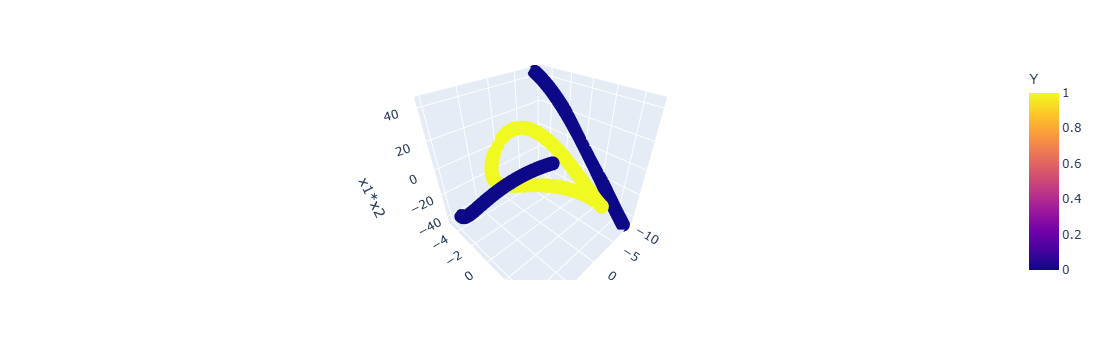

In [70]:
import plotly.express as px
fig = px.scatter_3d(df,x='x1',y='x2',z='x1*x2',color='Y')
fig.show()

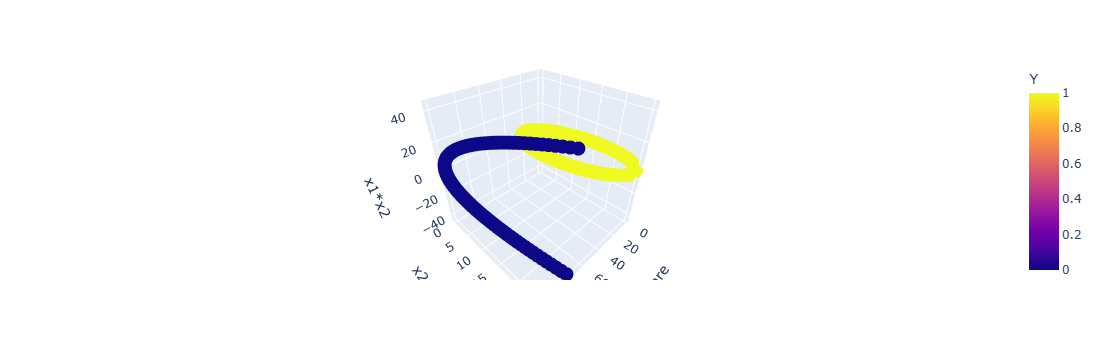

In [71]:
# now both are seperated
import plotly.express as px
fig = px.scatter_3d(df,x='x1_square',y='x2_square',z='x1*x2',color='Y')
fig.show()

In [72]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [73]:
y_pred = svc.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))

1.0


In [75]:
poly = SVC(kernel='poly')
poly.fit(x_train,y_train)
y_pred = poly.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
